In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load Dataset
df = pd.read_csv("../dataset/BBC News Train.csv")

Classification Report:

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      1.00      1.00        46
     politics       0.95      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.97      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



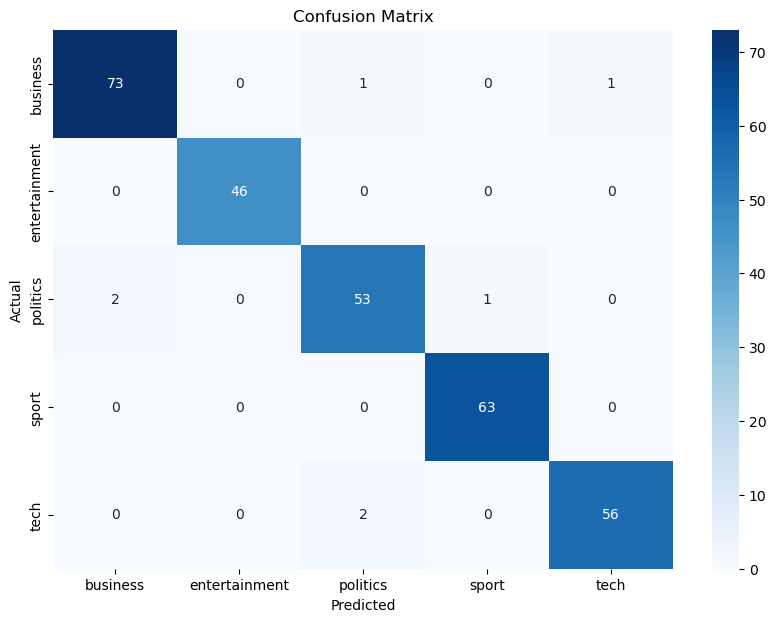

In [7]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Category'], test_size=0.2, random_state=42)

# Convert Text to Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(stop_words='english')  # You can pass preprocessed text here too
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict
y_pred = clf.predict(X_test_counts)

# Accuracy & Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
labels = clf.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Example: Custom Text to Predict
new_texts = [
    "The government has announced new tax reforms for small businesses.",
    "Manchester United won the championship after a thrilling match.",
    "Apple is launching its latest iPhone with advanced features.",
    "The Prime Minister addressed the current economic crisis.",
    "New blockbuster movie breaks box office records."
]

# Transform Custom Texts into Feature Vectors
new_texts_counts = vectorizer.transform(new_texts)

# Predict Classes
predicted_classes = clf.predict(new_texts_counts)

# Print Predictions
for text, pred in zip(new_texts, predicted_classes):
    print(f"Text: \"{text}\" → Predicted Class: {pred}")


Text: "The government has announced new tax reforms for small businesses." → Predicted Class: business
Text: "Manchester United won the championship after a thrilling match." → Predicted Class: sport
Text: "Apple is launching its latest iPhone with advanced features." → Predicted Class: tech
Text: "The Prime Minister addressed the current economic crisis." → Predicted Class: politics
Text: "New blockbuster movie breaks box office records." → Predicted Class: entertainment


In [10]:
# Example custom news texts
business_news = "Global market trends indicate a significant rise in e-commerce investments. Major companies are expanding their online presence to capture growing digital consumer demand."
entertainment_news = "The latest blockbuster movie, directed by renowned filmmaker Jane Doe, has shattered box office records and received rave reviews from critics. Red carpet"
politics_news = "In a recent speech, leader michael, down street, council tax, tory leader, election campaign, mr kennedy Leader Government the President outlined new policies and constitutions aimed at improving national healthcare and addressing income inequality in the country."
sports_news = "The local soccer team secured a dramatic victory in the championship final, with a last-minute goal clinching the title against their long-time rivals."
tech_news = "Tech giants Computer are unveiling their newest smart phones featuring advanced AI capabilities and enhanced security features that promise to revolutionize the industry."



business_vectorized = vectorizer.transform([(business_news)])
entertainment_vectorized = vectorizer.transform([(entertainment_news)])
politics_vectorized = vectorizer.transform([(politics_news)])
sports_vectorized = vectorizer.transform([(sports_news)])
tech_vectorized = vectorizer.transform([(tech_news)])



predicted_business = clf.predict(business_vectorized)[0]
predicted_entertainment = clf.predict(entertainment_vectorized)[0]
predicted_politics = clf.predict(politics_vectorized)[0]
predicted_sports = clf.predict(sports_vectorized)[0]
predicted_tech = clf.predict(tech_vectorized)[0]


print(f"Business news predicted as: {predicted_business}")
print(f"Entertainment news predicted as: {predicted_entertainment}")
print(f"Politics news predicted as: {predicted_politics}")
print(f"Sports news predicted as: {predicted_sports}")
print(f"Tech news predicted as: {predicted_tech}")


Business news predicted as: business
Entertainment news predicted as: entertainment
Politics news predicted as: politics
Sports news predicted as: sport
Tech news predicted as: tech


In [11]:
import joblib
filename = "../model/naive_bayes.pkl"
joblib.dump(clf, filename)

['../model/naive_bayes.pkl']

In [14]:
filename  = "../model/nb_vectorizer.pkl"
joblib.dump(vectorizer, filename)

['../model/nb_vectorizer.pkl']

In [17]:
import joblib
filename = "../model/naive_bayes.pkl"
vectorizer_filename = "../model/nb_vectorizer.pkl"
loaded_model = joblib.load(filename)
loaded_vectorizer = joblib.load(vectorizer_filename)



In [19]:
business_news = "Global market trends indicate a significant rise in e-commerce investments. Major companies are expanding their online presence to capture growing digital consumer demand."


business_vectorized = loaded_vectorizer.transform([business_news])
predicted_business = loaded_model.predict(business_vectorized[0])
print(predicted_business)

['business']
